# SKIN-DISEASE-ANALYZER NOTEBOOK

#### Importing Libraries

In [3]:
from keras.models import Model, load_model
from keras.layers import Dense, GlobalAveragePooling2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline
import scipy
import tensorflow
import scipy
import tensorflow

#### Using VGG19 Transfer Learning Technique

In [2]:
base_model = tensorflow.keras.applications.VGG19(include_top=False, weights='imagenet', input_shape=(32,32,3))
for layer in base_model.layers[:-5]:
    layer.trainable = False

output = base_model.output
x = GlobalAveragePooling2D()(output)
x = Dense(1024, activation='relu')(x)
x = Dense(9, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

#### Feature Extraction

In [3]:
early_stopper = EarlyStopping(min_delta=0.001, patience=5)

model_chkpt = ModelCheckpoint('skin_disease_model.h5',
                              monitor='val_loss', verbose=1, 
                              save_best_only=True)
batch_size = 16
nb_classes = 9
nb_epoch = 5
data_augmentation = True

# input image dimensions
img_rows, img_cols = 32, 32
# The CIFAR10 images are RGB.
img_channels = 3
train_path='dataFinalTry/train'
test_path='dataFinalTry/test'
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1./ 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./ 255)

In [4]:
classes = ['Acne On Body', 'Acne On Face', 'Acne On Forehead', 'Actinic Cheilitis', 'Alopecia Areata', 'Eczema Foot', 'Nail Fungal', 'Nose Rosacea', 'Raynauds Phenomenon']
len(classes)

9

In [5]:
train_data=train_datagen.flow_from_directory(train_path,classes=classes,target_size=(32,32),batch_size=16)
test_data=test_datagen.flow_from_directory(test_path,classes=classes,target_size=(32,32),batch_size=16)

Found 1608 images belonging to 9 classes.
Found 148 images belonging to 9 classes.


#### Training

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [7]:
history=model.fit_generator(train_data,
                            validation_data=test_data,
                            epochs=30,
                            verbose=1, callbacks=[model_chkpt])

C:\Users\Sufiyan\AppData\Local\Temp\ipykernel_20248\679521640.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_data,


Epoch 1/30
101/101 [==============================] - ETA: 0s - loss: 1.5517 - accuracy: 0.4310
Epoch 1: val_loss improved from inf to 0.60824, saving model to model_vgg19_try.h5
101/101 [==============================] - 31s 299ms/step - loss: 1.5517 - accuracy: 0.4310 - val_loss: 0.6082 - val_accuracy: 0.7770
Epoch 2/30
101/101 [==============================] - ETA: 0s - loss: 0.8433 - accuracy: 0.7376
Epoch 2: val_loss improved from 0.60824 to 0.60187, saving model to model_vgg19_try.h5
101/101 [==============================] - 24s 233ms/step - loss: 0.8433 - accuracy: 0.7376 - val_loss: 0.6019 - val_accuracy: 0.8041
Epoch 3/30
101/101 [==============================] - ETA: 0s - loss: 0.6402 - accuracy: 0.8147
Epoch 3: val_loss improved from 0.60187 to 0.42913, saving model to model_vgg19_try.h5
101/101 [==============================] - 23s 223ms/step - loss: 0.6402 - accuracy: 0.8147 - val_loss: 0.4291 - val_accuracy: 0.8784
Epoch 4/30
101/101 [==============================] -

101/101 [==============================] - 22s 219ms/step - loss: 0.2048 - accuracy: 0.9558 - val_loss: 0.6010 - val_accuracy: 0.9189
Epoch 30/30
101/101 [==============================] - ETA: 0s - loss: 0.1113 - accuracy: 0.9733
Epoch 30: val_loss did not improve from 0.26735
101/101 [==============================] - 23s 223ms/step - loss: 0.1113 - accuracy: 0.9733 - val_loss: 0.2997 - val_accuracy: 0.9324


As you can see we've got validation_loss of 0.26735
with an accuracy of 94.59%

#### Data Visualization

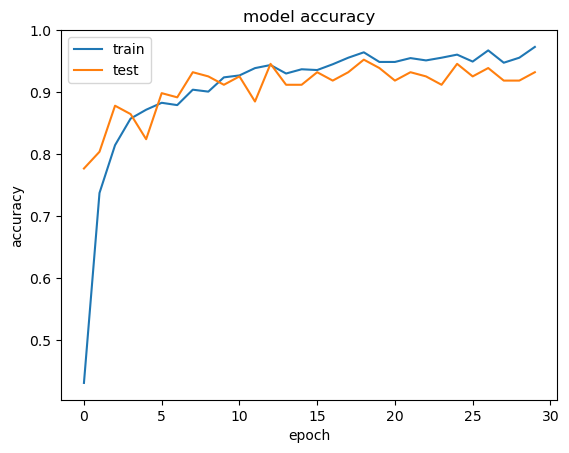

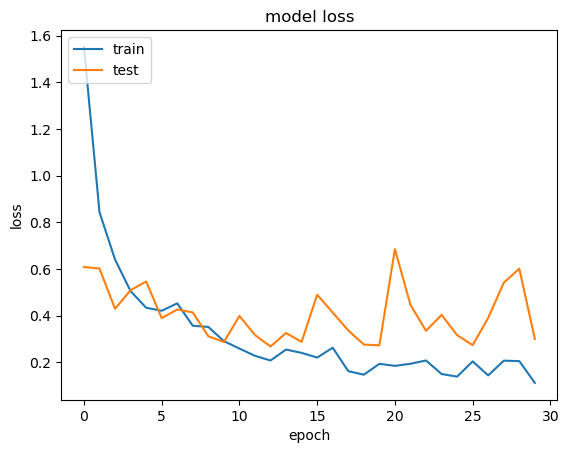

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [4]:
model = load_model('skin_disease_model.h5', compile=True)

#### Testing Model

In [5]:
import cv2
img = 'a.jpg'
img = cv2.resize(cv2.imread(img), (32,32)) / 255.0
prediction = model.predict(img.reshape(1,32,32,3))
print(np.argmax(prediction))

1/1 [==============================] - 1s 518ms/step
2


In [13]:
import os

In [14]:
trainlist = os.listdir('dataFinal/train')
trainlist

['Acne On Body',
 'Acne On Face',
 'Acne On Forehead',
 'Actinic Cheilitis',
 'Alopecia Areata',
 'Eczema Foot',
 'Nail Fungal',
 'Nose Rosacea',
 'Raynauds Phenomenon']

In [15]:
testlist = os.listdir('dataFinal/test')
testlist

['Acne On body',
 'Acne On Face',
 'Acne On Forehead',
 'Actinic Cheilitis',
 'Alopecia Areata',
 'Eczema Foot',
 'Nail Fungal',
 'Nose Rosacea',
 'Raynauds Phenomenon']

In [14]:
listbody = os.listdir('dataFinal/test/Acne On body')
for i in range(len(listbody)):
    l = listbody[i]
    img = 'DataFinal/test/Acne On body/'+l
    img = cv2.resize(cv2.imread(img), (32,32)) / 255.0
    prediction = model.predict(img.reshape(1,32,32,3))
    print(np.argmax(prediction))

1/1 [==============================] - 0s 144ms/step
0
1/1 [==============================] - 0s 28ms/step
0
1/1 [==============================] - 0s 28ms/step
0
1/1 [==============================] - 0s 30ms/step
0
1/1 [==============================] - 0s 21ms/step
0
1/1 [==============================] - 0s 31ms/step
0
1/1 [==============================] - 0s 31ms/step
0
1/1 [==============================] - 0s 28ms/step
0
1/1 [==============================] - 0s 28ms/step
5
1/1 [==============================] - 0s 23ms/step
5
1/1 [==============================] - 0s 27ms/step
0
1/1 [==============================] - 0s 28ms/step
0
1/1 [==============================] - 0s 27ms/step
0
1/1 [==============================] - 0s 28ms/step
0
1/1 [==============================] - 0s 27ms/step
0
1/1 [==============================] - 0s 29ms/step
0
1/1 [==============================] - 0s 29ms/step
0
1/1 [==============================] - 0s 30ms/step
0
1/1 [======================

In [15]:
listbody = os.listdir('dataFinal/test/Acne On Face')
for i in range(len(listbody)):
    l = listbody[i]
    img = 'DataFinal/test/Acne On Face/'+l
    img = cv2.resize(cv2.imread(img), (32,32)) / 255.0
    prediction = model.predict(img.reshape(1,32,32,3))
    print(np.argmax(prediction))

1/1 [==============================] - 0s 27ms/step
3
1/1 [==============================] - 0s 29ms/step
5
1/1 [==============================] - 0s 28ms/step
5
1/1 [==============================] - 0s 14ms/step
5
1/1 [==============================] - 0s 28ms/step
1
1/1 [==============================] - 0s 22ms/step
1
1/1 [==============================] - 0s 28ms/step
1
1/1 [==============================] - 0s 28ms/step
1
1/1 [==============================] - 0s 27ms/step
5
1/1 [==============================] - 0s 28ms/step
1
1/1 [==============================] - 0s 28ms/step
1
1/1 [==============================] - 0s 28ms/step
1
1/1 [==============================] - 0s 28ms/step
1
1/1 [==============================] - 0s 28ms/step
1
1/1 [==============================] - 0s 27ms/step
5
1/1 [==============================] - 0s 27ms/step
5
1/1 [==============================] - 0s 29ms/step
1
1/1 [==============================] - 0s 29ms/step
1


In [16]:
listbody = os.listdir('dataFinal/test/Acne On Forehead')
for i in range(len(listbody)):
    l = listbody[i]
    img = 'DataFinal/test/Acne On Forehead/'+l
    img = cv2.resize(cv2.imread(img), (32,32)) / 255.0
    prediction = model.predict(img.reshape(1,32,32,3))
    print(np.argmax(prediction))

1/1 [==============================] - 0s 29ms/step
2
1/1 [==============================] - 0s 29ms/step
2
1/1 [==============================] - 0s 23ms/step
2
1/1 [==============================] - 0s 27ms/step
2
1/1 [==============================] - 0s 28ms/step
2
1/1 [==============================] - 0s 29ms/step
2
1/1 [==============================] - 0s 28ms/step
2
1/1 [==============================] - 0s 21ms/step
2
1/1 [==============================] - 0s 26ms/step
2
1/1 [==============================] - 0s 28ms/step
2
1/1 [==============================] - 0s 28ms/step
2
1/1 [==============================] - 0s 28ms/step
2
1/1 [==============================] - 0s 29ms/step
2
1/1 [==============================] - 0s 29ms/step
2
1/1 [==============================] - 0s 29ms/step
2
1/1 [==============================] - 0s 27ms/step
2
1/1 [==============================] - 0s 27ms/step
2
1/1 [==============================] - 0s 28ms/step
2


In [17]:
listbody = os.listdir('dataFinal/test/Actinic Cheilitis')
for i in range(len(listbody)):
    l = listbody[i]
    img = 'DataFinal/test/Actinic Cheilitis/'+l
    img = cv2.resize(cv2.imread(img), (32,32)) / 255.0
    prediction = model.predict(img.reshape(1,32,32,3))
    print(np.argmax(prediction))

1/1 [==============================] - 0s 26ms/step
3
1/1 [==============================] - 0s 27ms/step
3
1/1 [==============================] - 0s 26ms/step
3
1/1 [==============================] - 0s 27ms/step
3
1/1 [==============================] - 0s 29ms/step
3
1/1 [==============================] - 0s 29ms/step
3
1/1 [==============================] - 0s 29ms/step
3
1/1 [==============================] - 0s 26ms/step
3
1/1 [==============================] - 0s 28ms/step
3
1/1 [==============================] - 0s 28ms/step
3
1/1 [==============================] - 0s 29ms/step
3
1/1 [==============================] - 0s 28ms/step
3
1/1 [==============================] - 0s 27ms/step
3
1/1 [==============================] - 0s 27ms/step
3
1/1 [==============================] - 0s 28ms/step
3
1/1 [==============================] - 0s 29ms/step
3
1/1 [==============================] - 0s 29ms/step
3
1/1 [==============================] - 0s 29ms/step
3


In [18]:
listbody = os.listdir('dataFinal/test/Alopecia Areata')
for i in range(len(listbody)):
    l = listbody[i]
    img = 'DataFinal/test/Alopecia Areata/'+l
    img = cv2.resize(cv2.imread(img), (32,32)) / 255.0
    prediction = model.predict(img.reshape(1,32,32,3))
    print(np.argmax(prediction))

1/1 [==============================] - 0s 28ms/step
4
1/1 [==============================] - 0s 28ms/step
4
1/1 [==============================] - 0s 27ms/step
4
1/1 [==============================] - 0s 28ms/step
4
1/1 [==============================] - 0s 27ms/step
4
1/1 [==============================] - 0s 28ms/step
4
1/1 [==============================] - 0s 28ms/step
4
1/1 [==============================] - 0s 23ms/step
4
1/1 [==============================] - 0s 27ms/step
4
1/1 [==============================] - 0s 23ms/step
4
1/1 [==============================] - 0s 26ms/step
4
1/1 [==============================] - 0s 27ms/step
4
1/1 [==============================] - 0s 27ms/step
4
1/1 [==============================] - 0s 30ms/step
4
1/1 [==============================] - 0s 29ms/step
4
1/1 [==============================] - 0s 27ms/step
4
1/1 [==============================] - 0s 30ms/step
4
1/1 [==============================] - 0s 28ms/step
4
1/1 [=======================

In [26]:
listbody = os.listdir('dataFinal/test/Eczema Foot')
for i in range(len(listbody)):
    l = listbody[i]
    img = 'DataFinal/test/Eczema Foot/'+l
    img = cv2.resize(cv2.imread(img), (32,32)) / 255.0
    prediction = model.predict(img.reshape(1,32,32,3))
    print(np.argmax(prediction))

1/1 [==============================] - 0s 48ms/step
5
1/1 [==============================] - 0s 40ms/step
5
1/1 [==============================] - 0s 57ms/step
5
1/1 [==============================] - 0s 56ms/step
5
1/1 [==============================] - 0s 64ms/step
5
1/1 [==============================] - 0s 56ms/step
5
1/1 [==============================] - 0s 80ms/step
5
1/1 [==============================] - 0s 48ms/step
5
1/1 [==============================] - 0s 48ms/step
5
1/1 [==============================] - 0s 56ms/step
5
1/1 [==============================] - 0s 56ms/step
6
1/1 [==============================] - 0s 56ms/step
6
1/1 [==============================] - 0s 57ms/step
5
1/1 [==============================] - 0s 64ms/step
5
1/1 [==============================] - 0s 56ms/step
5
1/1 [==============================] - 0s 40ms/step
5


In [27]:
listbody = os.listdir('dataFinal/test/Nail Fungal')
for i in range(len(listbody)):
    l = listbody[i]
    img = 'DataFinal/test/Nail Fungal/'+l
    img = cv2.resize(cv2.imread(img), (32,32)) / 255.0
    prediction = model.predict(img.reshape(1,32,32,3))
    print(np.argmax(prediction))

1/1 [==============================] - 0s 40ms/step
3
1/1 [==============================] - 0s 63ms/step
8
1/1 [==============================] - 0s 55ms/step
8
1/1 [==============================] - 0s 65ms/step
8
1/1 [==============================] - 0s 56ms/step
3
1/1 [==============================] - 0s 56ms/step
5
1/1 [==============================] - 0s 49ms/step
8
1/1 [==============================] - 0s 48ms/step
3
1/1 [==============================] - 0s 49ms/step
8
1/1 [==============================] - 0s 66ms/step
5
1/1 [==============================] - 0s 49ms/step
5
1/1 [==============================] - 0s 57ms/step
8
1/1 [==============================] - 0s 66ms/step
6
1/1 [==============================] - 0s 49ms/step
5
1/1 [==============================] - 0s 46ms/step
5
1/1 [==============================] - 0s 40ms/step
5
1/1 [==============================] - 0s 48ms/step
5
1/1 [==============================] - 0s 45ms/step
8


In [28]:
listbody = os.listdir('dataFinal/test/Nose Rosacea')
for i in range(len(listbody)):
    l = listbody[i]
    img = 'DataFinal/test/Nose Rosacea/'+l
    img = cv2.resize(cv2.imread(img), (32,32)) / 255.0
    prediction = model.predict(img.reshape(1,32,32,3))
    print(np.argmax(prediction))

1/1 [==============================] - 0s 40ms/step
7
1/1 [==============================] - 0s 40ms/step
7
1/1 [==============================] - 0s 48ms/step
7
1/1 [==============================] - 0s 48ms/step
7
1/1 [==============================] - 0s 56ms/step
7
1/1 [==============================] - 0s 48ms/step
7
1/1 [==============================] - 0s 40ms/step
7
1/1 [==============================] - 0s 56ms/step
7
1/1 [==============================] - 0s 56ms/step
7
1/1 [==============================] - 0s 48ms/step
7
1/1 [==============================] - 0s 49ms/step
7
1/1 [==============================] - 0s 49ms/step
7
1/1 [==============================] - 0s 40ms/step
7
1/1 [==============================] - 0s 47ms/step
7
1/1 [==============================] - 0s 40ms/step
7
1/1 [==============================] - 0s 32ms/step
7
1/1 [==============================] - 0s 49ms/step
7
1/1 [==============================] - 0s 48ms/step
7
1/1 [=======================

In [29]:
listbody = os.listdir('dataFinal/test/Raynauds Phenomenon')
for i in range(len(listbody)):
    l = listbody[i]
    img = 'DataFinal/test/Raynauds Phenomenon/'+l
    img = cv2.resize(cv2.imread(img), (32,32)) / 255.0
    prediction = model.predict(img.reshape(1,32,32,3))
    print(np.argmax(prediction))

1/1 [==============================] - 0s 57ms/step
8
1/1 [==============================] - 0s 40ms/step
8
1/1 [==============================] - 0s 48ms/step
3
1/1 [==============================] - 0s 58ms/step
8
1/1 [==============================] - 0s 56ms/step
8
1/1 [==============================] - 0s 57ms/step
8
1/1 [==============================] - 0s 80ms/step
8
1/1 [==============================] - 0s 57ms/step
8
1/1 [==============================] - 0s 50ms/step
8
1/1 [==============================] - 0s 48ms/step
8
1/1 [==============================] - 0s 47ms/step
8
1/1 [==============================] - 0s 56ms/step
8
1/1 [==============================] - 0s 48ms/step
8
1/1 [==============================] - 0s 32ms/step
8
1/1 [==============================] - 0s 40ms/step
8
1/1 [==============================] - 0s 32ms/step
8
1/1 [==============================] - 0s 32ms/step
8
1/1 [==============================] - 0s 40ms/step
8
1/1 [=======================